<a href="https://colab.research.google.com/github/sssibimithra-1503/Exploratory-Data-Analysis-of-Coffee-Sales/blob/main/02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

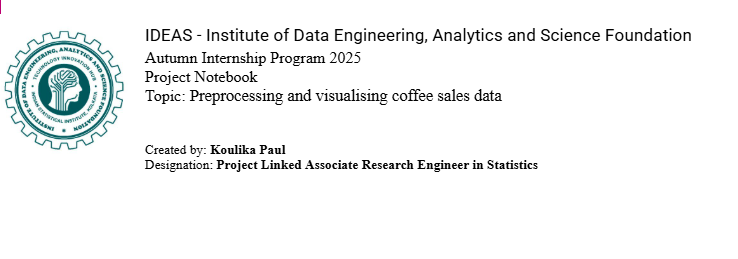

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from google.colab import files
uploaded = files.upload()

Saving Coffe_sales.csv to Coffe_sales (2).csv


In [61]:
coffee_data=pd.read_csv("Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [62]:
print("Number of columns:",coffee_data.shape[1])
duplicate_col = coffee_data.columns[coffee_data.columns.duplicated()]
print("Duplicate Columns:",list(duplicate_col))
print("\nMissing Values:")
print(coffee_data.isnull().sum())

Number of columns: 11
Duplicate Columns: []

Missing Values:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [63]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [64]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [65]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year)

***Average money for each year***

In [66]:
grouped_data=coffee_data.groupby('Year')['money'].mean()
grouped_data

,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [67]:
grouped_data = coffee_data.groupby("Month_name")["money"].sum()
print(grouped_data)
print("\nData type of grouped data is", type(grouped_data))

Month_name
Apr     5719.56
Aug     7613.84
Dec     8237.74
Feb    13215.48
Jan     6398.86
Jul     6915.94
Jun     7617.76
Mar    15891.64
May     8164.42
Nov     8590.54
Oct    13891.16
Sep     9988.64
Name: money, dtype: float64

Data type of grouped data is <class 'pandas.core.series.Series'>


**Q3. Find the maximum money for each month**

In [68]:
max_money_per_month = coffee_data.groupby("Month_name")["money"].max()
print("maximum money for each month:")
print(max_money_per_month)

maximum money for each month:
Month_name
Apr    38.70
Aug    32.82
Dec    35.76
Feb    35.76
Jan    35.76
Jul    37.72
Jun    37.72
Mar    38.70
May    37.72
Nov    35.76
Oct    35.76
Sep    35.76
Name: money, dtype: float64


***Distribution of money over months***

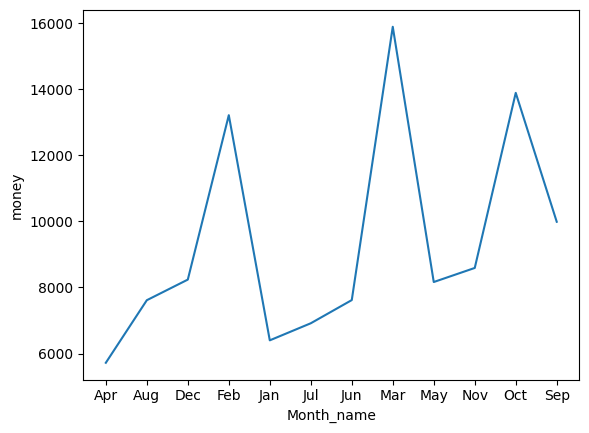

In [69]:
plot_data_1=grouped_data.reset_index()
sns.lineplot(x=plot_data_1['Month_name'],y=plot_data_1['money'])
plt.show()

***The density of money over years***

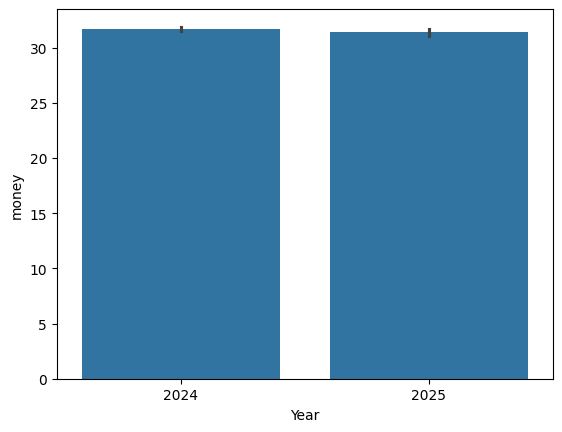

In [70]:
sns.barplot(x=coffee_data['Year'], y=coffee_data['money'])
plt.show()



**Q4. Find the distribution of money over coffee names**


Total money for earned for each coffee type coffee_name
Americano              14650.26
Americano with Milk    24751.12
Cappuccino             17439.14
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Hot Chocolate           9933.46
Latte                  26875.30
Name: money, dtype: float64


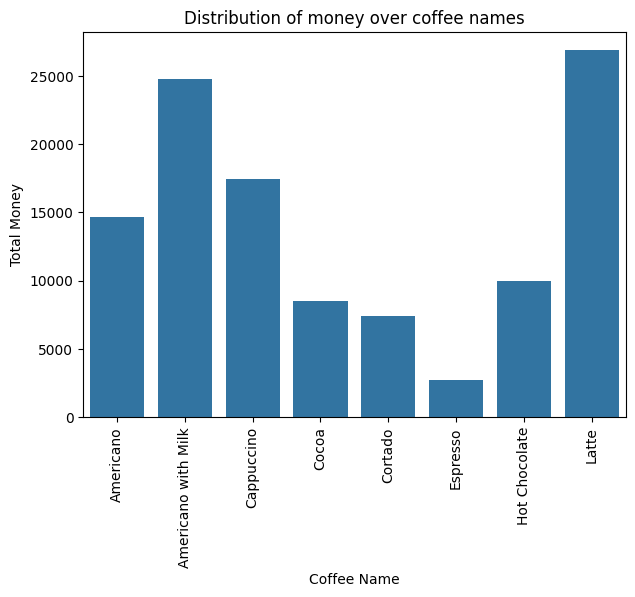

In [71]:
money_by_coffee=coffee_data.groupby("coffee_name")["money"].sum()
print("Total money for earned for each coffee type",money_by_coffee)
plt.figure(figsize=(7,5))
sns.barplot(x=money_by_coffee.index, y=money_by_coffee.values)
plt.title("Distribution of money over coffee names")
plt.xlabel("Coffee Name")
plt.ylabel("Total Money")
plt.xticks(rotation=90)
plt.show()

***Times of the Day the dataset holds***

In [72]:
time_of_day=coffee_data['Time_of_Day'].value_counts()
print("Time of day",time_of_day)

Time of day Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64


**Q5. How many types of coffees are present in the dataset?**

In [73]:
coffee_list = coffee_data["coffee_name"].unique()
print("coffee types present:",coffee_list)
coffee_listn = coffee_data["coffee_name"].nunique()
print("Number of coffee types present:",coffee_listn)

coffee types present: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Number of coffee types present: 8


***Max money from coffee_name***

In [74]:
max_money=coffee_data.groupby('coffee_name')['money'].max()
print("Maximum money from coffee name:",max_money)

Maximum money from coffee name: coffee_name
Americano              28.9
Americano with Milk    33.8
Cappuccino             38.7
Cocoa                  38.7
Cortado                28.9
Espresso               24.0
Hot Chocolate          38.7
Latte                  38.7
Name: money, dtype: float64


**Q6. Find the average money made at what time of the day.**

Average money made at a time of day: Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


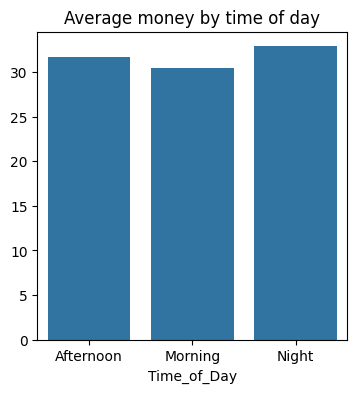

In [75]:
coffee_data = pd.read_csv("Coffe_sales.csv")
average_money_time = coffee_data.groupby("Time_of_Day")["money"].mean()
print("Average money made at a time of day:",average_money_time)
plt.figure(figsize=(4,4))
sns.barplot(x=average_money_time.index, y=average_money_time.values)
plt.title("Average money by time of day")
plt.show()


***Generate 100 synthetic data rows***

In [76]:

import numpy as np
import pandas as pd
import random
n=100
date_range= pd.date_range(start="2023-01-01", periods=n, freq="D")
times= pd.date_range("06:00","22:00",freq="1h").time
df = pd.DataFrame({
    "Date": date_range,
    "Time":[random.choice(times) for _ in range(n)],
    "hour_of_day":[random.randint(6,22) for _ in range(n)],
    "Time_of_Day":[random.choice(["Morning","Afternoon","Night"]) for _ in range(n)],
    "money":np.round(np.random.uniform(18,40,n),2),
    "coffee_name":[random.choice(["Americano","Americano with Milk","Cappuccino","Cocoa","Cortado","Espresso","Hot Chocolate","Latte"]) for _ in range(n)],
    "cash_type":[random.choice(["card"])for _ in range(n)],
    "Weekday":[d.day_name()for d in date_range],
    "Weekdaysort":[d.weekday()+1 for d in date_range],
    "Month_name":[d.strftime("%b") for d in date_range],
    "Monthsort":[d.month for d in date_range]
})
df['Date']= pd.to_datetime(df['Date']).dt.strftime("%Y-%m-%d")
df['Time']= pd.to_datetime(df['Time'].astype(str)).dt.strftime("%H:%M:%S.%f")
print(df.head())
print("\nShape of synthetic data:", df.shape)



         Date             Time  hour_of_day Time_of_Day  money coffee_name  \
0  2023-01-01  15:00:00.000000           18   Afternoon  35.41    Espresso   
1  2023-01-02  08:00:00.000000           13     Morning  23.03   Americano   
2  2023-01-03  19:00:00.000000           11     Morning  37.00     Cortado   
3  2023-01-04  12:00:00.000000           22     Morning  34.85  Cappuccino   
4  2023-01-05  10:00:00.000000            6     Morning  27.61    Espresso   

  cash_type    Weekday  Weekdaysort Month_name  Monthsort  
0      card     Sunday            7        Jan          1  
1      card     Monday            1        Jan          1  
2      card    Tuesday            2        Jan          1  
3      card  Wednesday            3        Jan          1  
4      card   Thursday            4        Jan          1  

Shape of synthetic data: (100, 11)


/tmp/ipython-input-3893628758.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time'].astype(str)).dt.strftime("%H:%M:%S.%f")


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [77]:
import pandas as pd
coffee_data = pd.read_csv("Coffe_sales.csv")
df = df[coffee_data.columns]
combined_data = pd.concat([coffee_data,df], ignore_index = True)
combined_data.to_csv("Coffe_sales_synthetic_data.csv", index=False)
syn_coffee_data = pd.read_csv("Coffe_sales_synthetic_data.csv")
syn_coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3642,11,card,35.20,Hot Chocolate,Morning,Thursday,Apr,4,4,2023-04-06,18:00:00.000000
3643,7,card,18.43,Espresso,Night,Friday,Apr,5,4,2023-04-07,15:00:00.000000
3644,9,card,33.72,Cortado,Afternoon,Saturday,Apr,6,4,2023-04-08,11:00:00.000000
3645,9,card,37.74,Americano,Afternoon,Sunday,Apr,7,4,2023-04-09,15:00:00.000000


In [78]:
print("Number of columns:",syn_coffee_data.shape[1])
duplicate_col = syn_coffee_data.columns[syn_coffee_data.columns.duplicated()]
print("Duplicate Columns:",list(duplicate_col))
print("\nMissing Values:")
print(syn_coffee_data.isnull().sum())

Number of columns: 11
Duplicate Columns: []

Missing Values:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [79]:
syn_coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3647.000000,3647.000000,3647.000000,3647.000000
mean,14.174116,31.590858,3.850014,6.337264
std,4.255371,4.927870,1.973144,3.525441
min,6.000000,18.110000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,6.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,39.370000,7.000000,12.000000


In [80]:
syn_coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [81]:
syn_coffee_data['Date']= pd.to_datetime(syn_coffee_data['Date'],errors='coerce')
syn_coffee_data['Month']=syn_coffee_data['Date'].dt.month
syn_coffee_data['Year']=(syn_coffee_data['Date'].dt.year)

In [82]:
grouped_data=syn_coffee_data.groupby('Year')['money'].mean()
grouped_data

,money
Year,
2023,29.662800
2024,31.737634
2025,31.390011


In [83]:
grouped_data_1 = syn_coffee_data.groupby("Month_name")["money"].sum()
print(grouped_data_1)
print("\nData type of grouped data is", type(grouped_data_1))

Month_name
Apr     6042.45
Aug     7613.84
Dec     8237.74
Feb    14053.33
Jan     7320.51
Jul     6915.94
Jun     7617.76
Mar    16775.53
May     8164.42
Nov     8590.54
Oct    13891.16
Sep     9988.64
Name: money, dtype: float64

Data type of grouped data is <class 'pandas.core.series.Series'>


maximum money for each month: Month_name
Apr    38.70
Aug    32.82
Dec    35.76
Feb    38.67
Jan    39.37
Jul    37.72
Jun    37.72
Mar    38.70
May    37.72
Nov    35.76
Oct    35.76
Sep    35.76
Name: money, dtype: float64


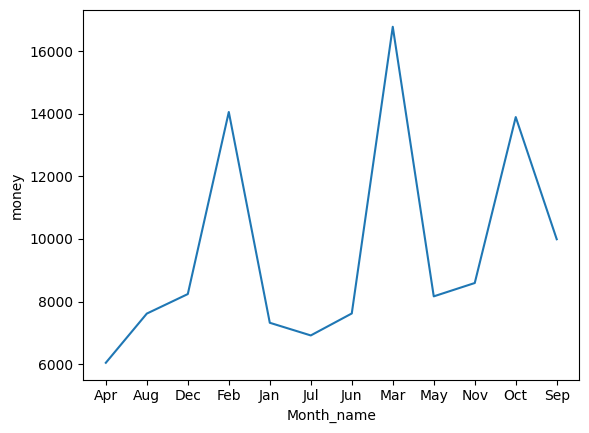

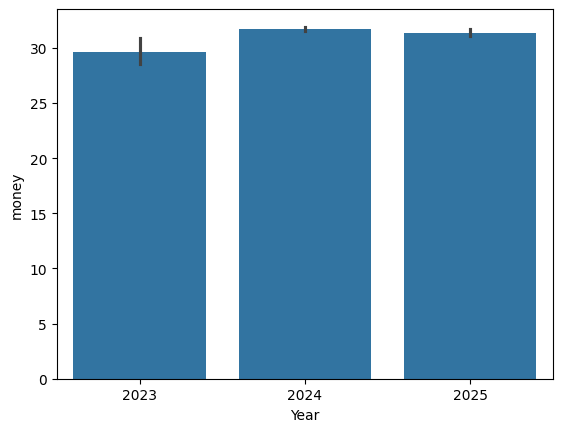

In [84]:
max_money_per_month = syn_coffee_data.groupby("Month_name")["money"].max()
print("maximum money for each month:", max_money_per_month)
plot_data=grouped_data_1.reset_index()
sns.lineplot(x=plot_data['Month_name'],y=plot_data['money'])
plt.show()
sns.barplot(x=syn_coffee_data['Year'], y=syn_coffee_data['money'])
plt.show()


Total money for earned for each coffee type coffee_name
Americano              15158.99
Americano with Milk    25197.04
Cappuccino             17772.44
Cocoa                   8973.93
Cortado                 7740.43
Espresso                3067.17
Hot Chocolate          10174.10
Latte                  27127.76
Name: money, dtype: float64


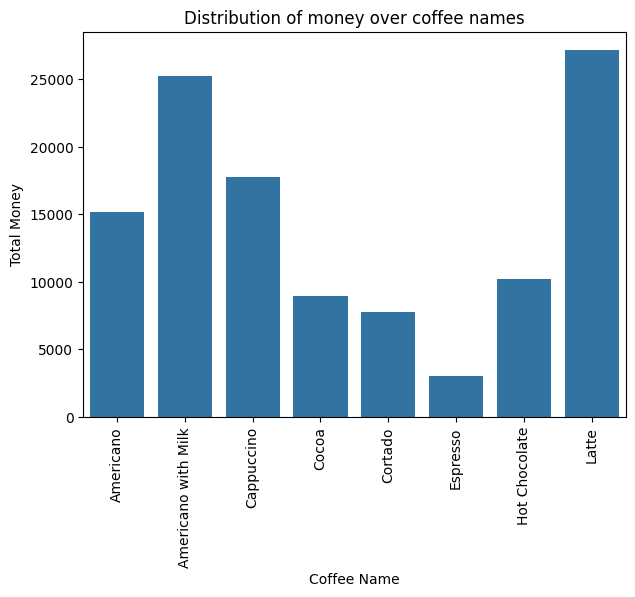

Time of day Time_of_Day
Afternoon    1235
Morning      1209
Night        1203
Name: count, dtype: int64


In [85]:
money_by_coffee=syn_coffee_data.groupby("coffee_name")["money"].sum()
print("Total money for earned for each coffee type",money_by_coffee)
plt.figure(figsize=(7,5))
sns.barplot(x=money_by_coffee.index, y=money_by_coffee.values)
plt.title("Distribution of money over coffee names")
plt.xlabel("Coffee Name")
plt.ylabel("Total Money")
plt.xticks(rotation=90)
plt.show()
time_of_day=syn_coffee_data['Time_of_Day'].value_counts()
print("Time of day",time_of_day)

In [86]:
coffee_list = syn_coffee_data["coffee_name"].unique()
print("coffee types present:",coffee_list)
coffee_listn = syn_coffee_data["coffee_name"].nunique()
print("Number of coffee types present:",coffee_listn)
max_money=syn_coffee_data.groupby('coffee_name')['money'].max()
print("Maximum money from coffee name:",max_money)

coffee types present: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Number of coffee types present: 8
Maximum money from coffee name: coffee_name
Americano              39.37
Americano with Milk    37.40
Cappuccino             38.70
Cocoa                  38.70
Cortado                38.61
Espresso               39.19
Hot Chocolate          38.70
Latte                  38.70
Name: money, dtype: float64


Average money made at a time of day: Time_of_Day
Afternoon    31.580340
Morning      30.411059
Night        32.787340
Name: money, dtype: float64


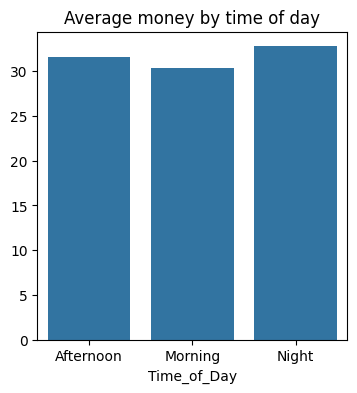

In [87]:
average_money_time = syn_coffee_data.groupby("Time_of_Day")["money"].mean()
print("Average money made at a time of day:",average_money_time)
plt.figure(figsize=(4,4))
sns.barplot(x=average_money_time.index, y=average_money_time.values)
plt.title("Average money by time of day")
plt.show()